In [1]:
import  numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

C:\Users\91909\AppData\Local\Temp\ipykernel_10604\479038415.py:10: RuntimeWarning: divide by zero encountered in true_divide
  im_dir = np.arctan(im_y/im_x)
C:\Users\91909\AppData\Local\Temp\ipykernel_10604\479038415.py:10: RuntimeWarning: invalid value encountered in true_divide
  im_dir = np.arctan(im_y/im_x)


<Figure size 640x480 with 0 Axes>

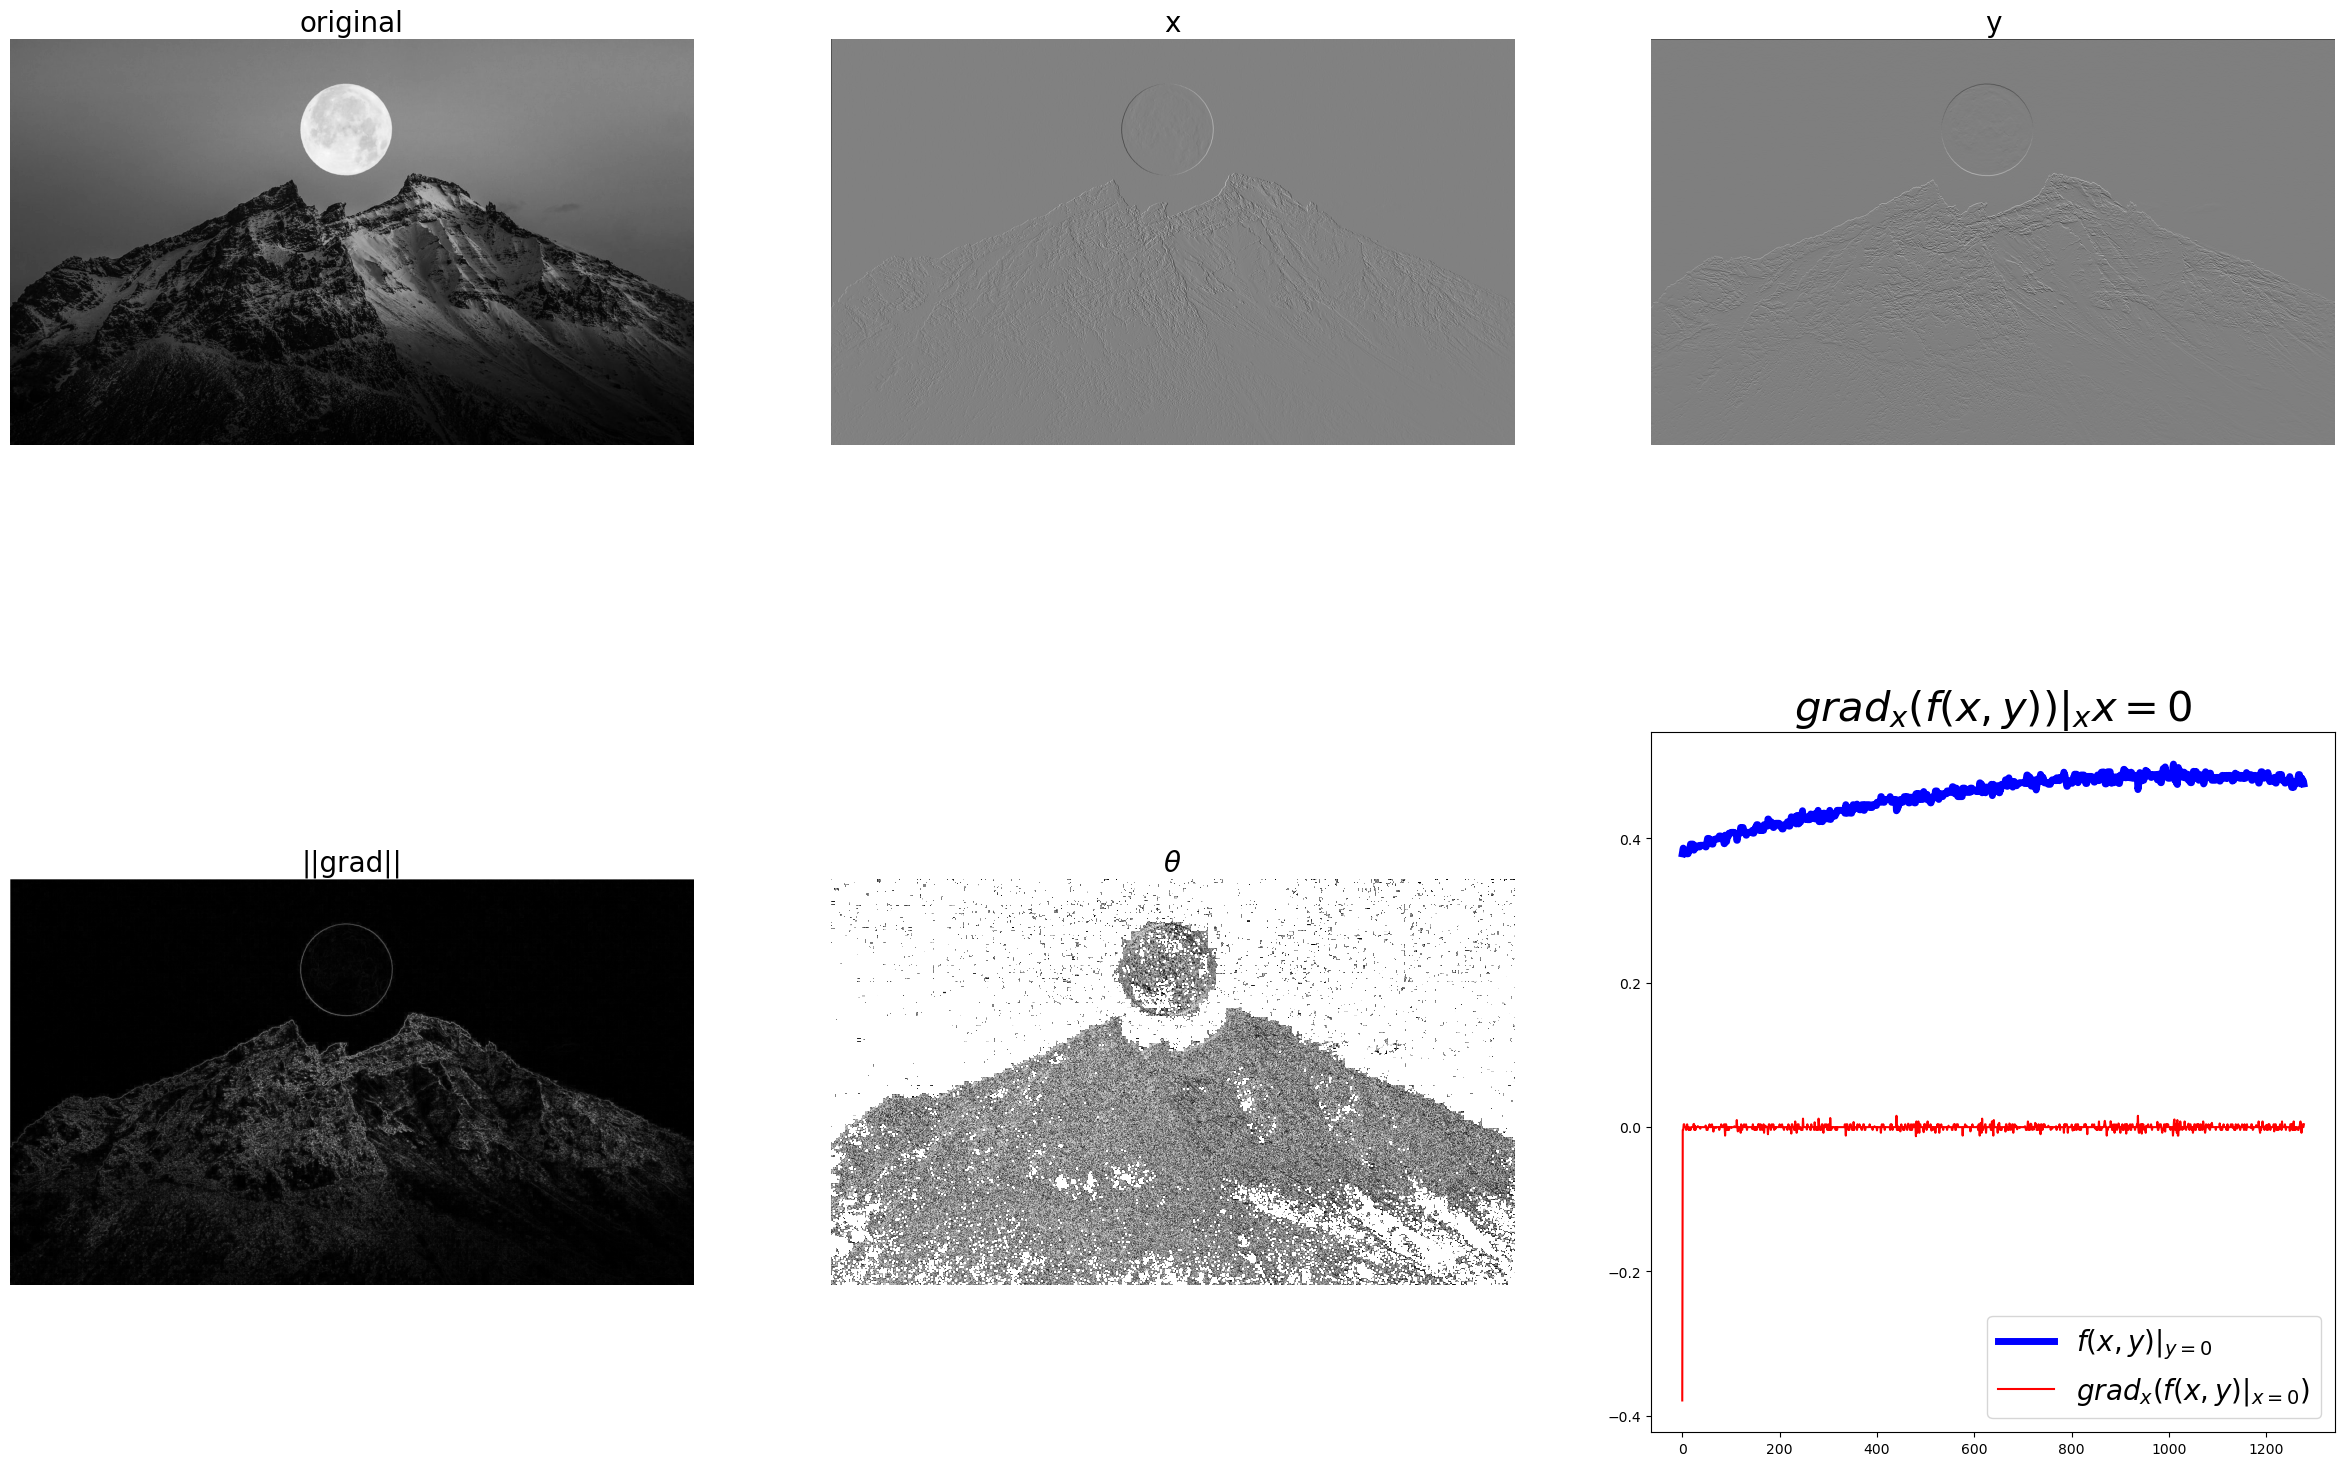

In [2]:
def plot_image(image,title):
    pylab.imshow(image), pylab.title(title,size=20),pylab.axis("off")

ker_x = [[-1,1]]
ker_y = [[-1],[1]]
im = rgb2gray(imread("image1.jpg"))
im_x = signal.convolve2d(im,ker_x,mode="same")
im_y = signal.convolve2d(im,ker_y,mode="same")
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan(im_y/im_x)
pylab.gray()
pylab.figure(figsize=(30,20))
pylab.subplot(231), plot_image(im,"original"), pylab.subplot(232), plot_image(im_x,"x")
pylab.subplot(233), plot_image(im_y,"y")
pylab.subplot(234), plot_image(im_mag,"||grad||")
pylab.subplot(235), plot_image(im_dir,r"$\theta$"), pylab.subplot(236)
pylab.plot(range(im.shape[1]),im[0,:],'b-',label=r"$f(x,y)|_{y=0}$",linewidth=5)
pylab.plot(range(im.shape[1]),im_x[0,:],'r-',label=r"$grad_x(f(x,y)|_{x=0}$)")
pylab.title(r"$grad_x (f(x,y)) | _x{x=0}$",size=30)
pylab.legend(prop={'size':20})
pylab.show()

In [3]:
# Displaying the magnitude and the gradient on the same image

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pylab as plt
from scipy import signal
import numpy as np

0.9709870588235294


C:\Users\91909\AppData\Local\Temp\ipykernel_10604\2051686252.py:8: RuntimeWarning: divide by zero encountered in true_divide
  im_ang = np.arctan(im_y/im_x)
C:\Users\91909\AppData\Local\Temp\ipykernel_10604\2051686252.py:8: RuntimeWarning: invalid value encountered in true_divide
  im_ang = np.arctan(im_y/im_x)


<Figure size 640x480 with 0 Axes>

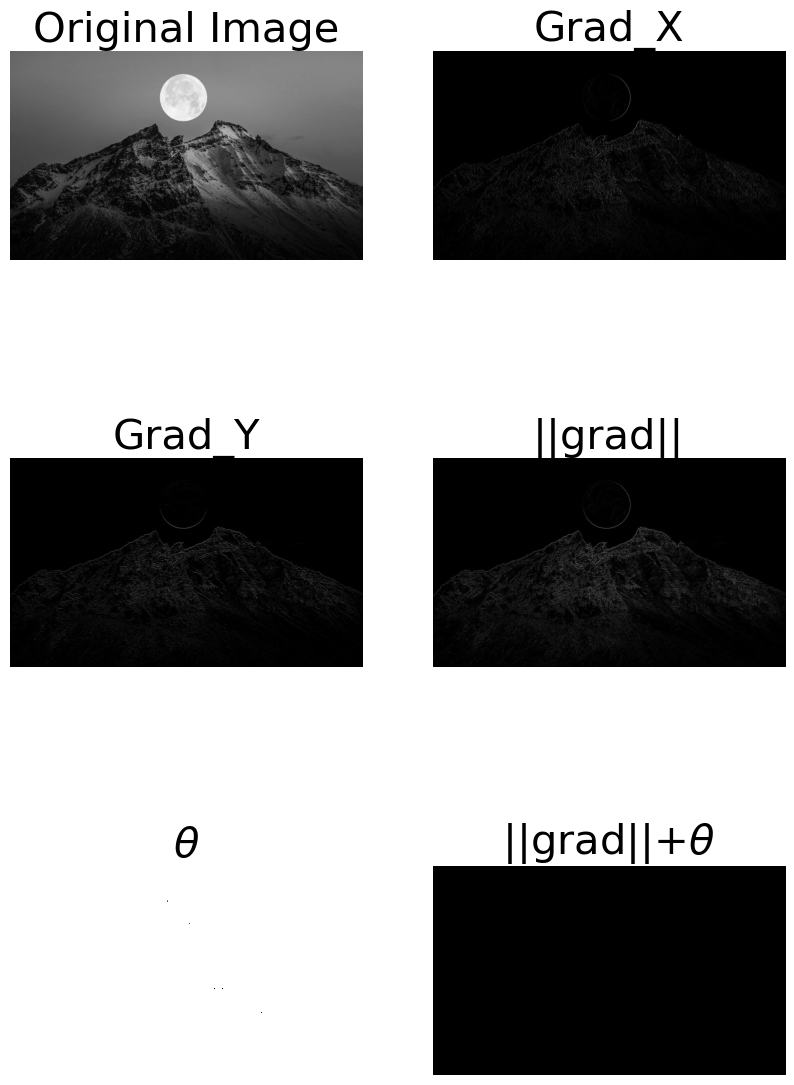

In [4]:
ker_x = [[-1,1]]
ker_y = [[-1],[1]]
im = rgb2gray(imread("image1.jpg"))
print(np.max(im))
im_x  = np.clip(signal.convolve2d(im,ker_x,mode="same"),0,1)
im_y  = np.clip(signal.convolve2d(im,ker_y,mode="same"),0,1)
im_mag = np.sqrt(im_x**2 + im_y**2)
im_ang = np.arctan(im_y/im_x)
plt.gray()
plt.figure(figsize=(10,15))
plt.subplot(321)
plt.imshow(im)
plt.title("Original Image",size=30)
plt.axis("off")
plt.subplot(322)
plt.imshow(im_x)
plt.title("Grad_X",size=30)
plt.axis("off")
plt.subplot(323)
plt.imshow(im_y)
plt.title("Grad_Y",size=30)
plt.axis("off")
plt.subplot(324)
plt.imshow(im_mag)
plt.title("||grad||",size=30)
plt.axis("off")
plt.subplot(325)
plt.imshow(im_ang)
plt.title(r"$\theta$",size=30)
plt.axis("off")
plt.subplot(326)
im = np.zeros((im.shape[0],im.shape[1],3))
im[...,0] = im_mag * np.sin(im_ang)
im[...,1] = im_mag * np.cos(im_ang)
plt.imshow(im)
plt.title(r"||grad||+$\theta$",size=30)
plt.axis("off")
plt.show()

In [5]:
# Effects of noise on gradient computation
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pylab as plt
from scipy import signal
import numpy as np

1.0000000000000004


C:\Users\91909\AppData\Local\Temp\ipykernel_10604\2961940753.py:14: RuntimeWarning: divide by zero encountered in true_divide
  im_ang = np.arctan(im_y/im_x)
C:\Users\91909\AppData\Local\Temp\ipykernel_10604\2961940753.py:14: RuntimeWarning: invalid value encountered in true_divide
  im_ang = np.arctan(im_y/im_x)


<Figure size 640x480 with 0 Axes>

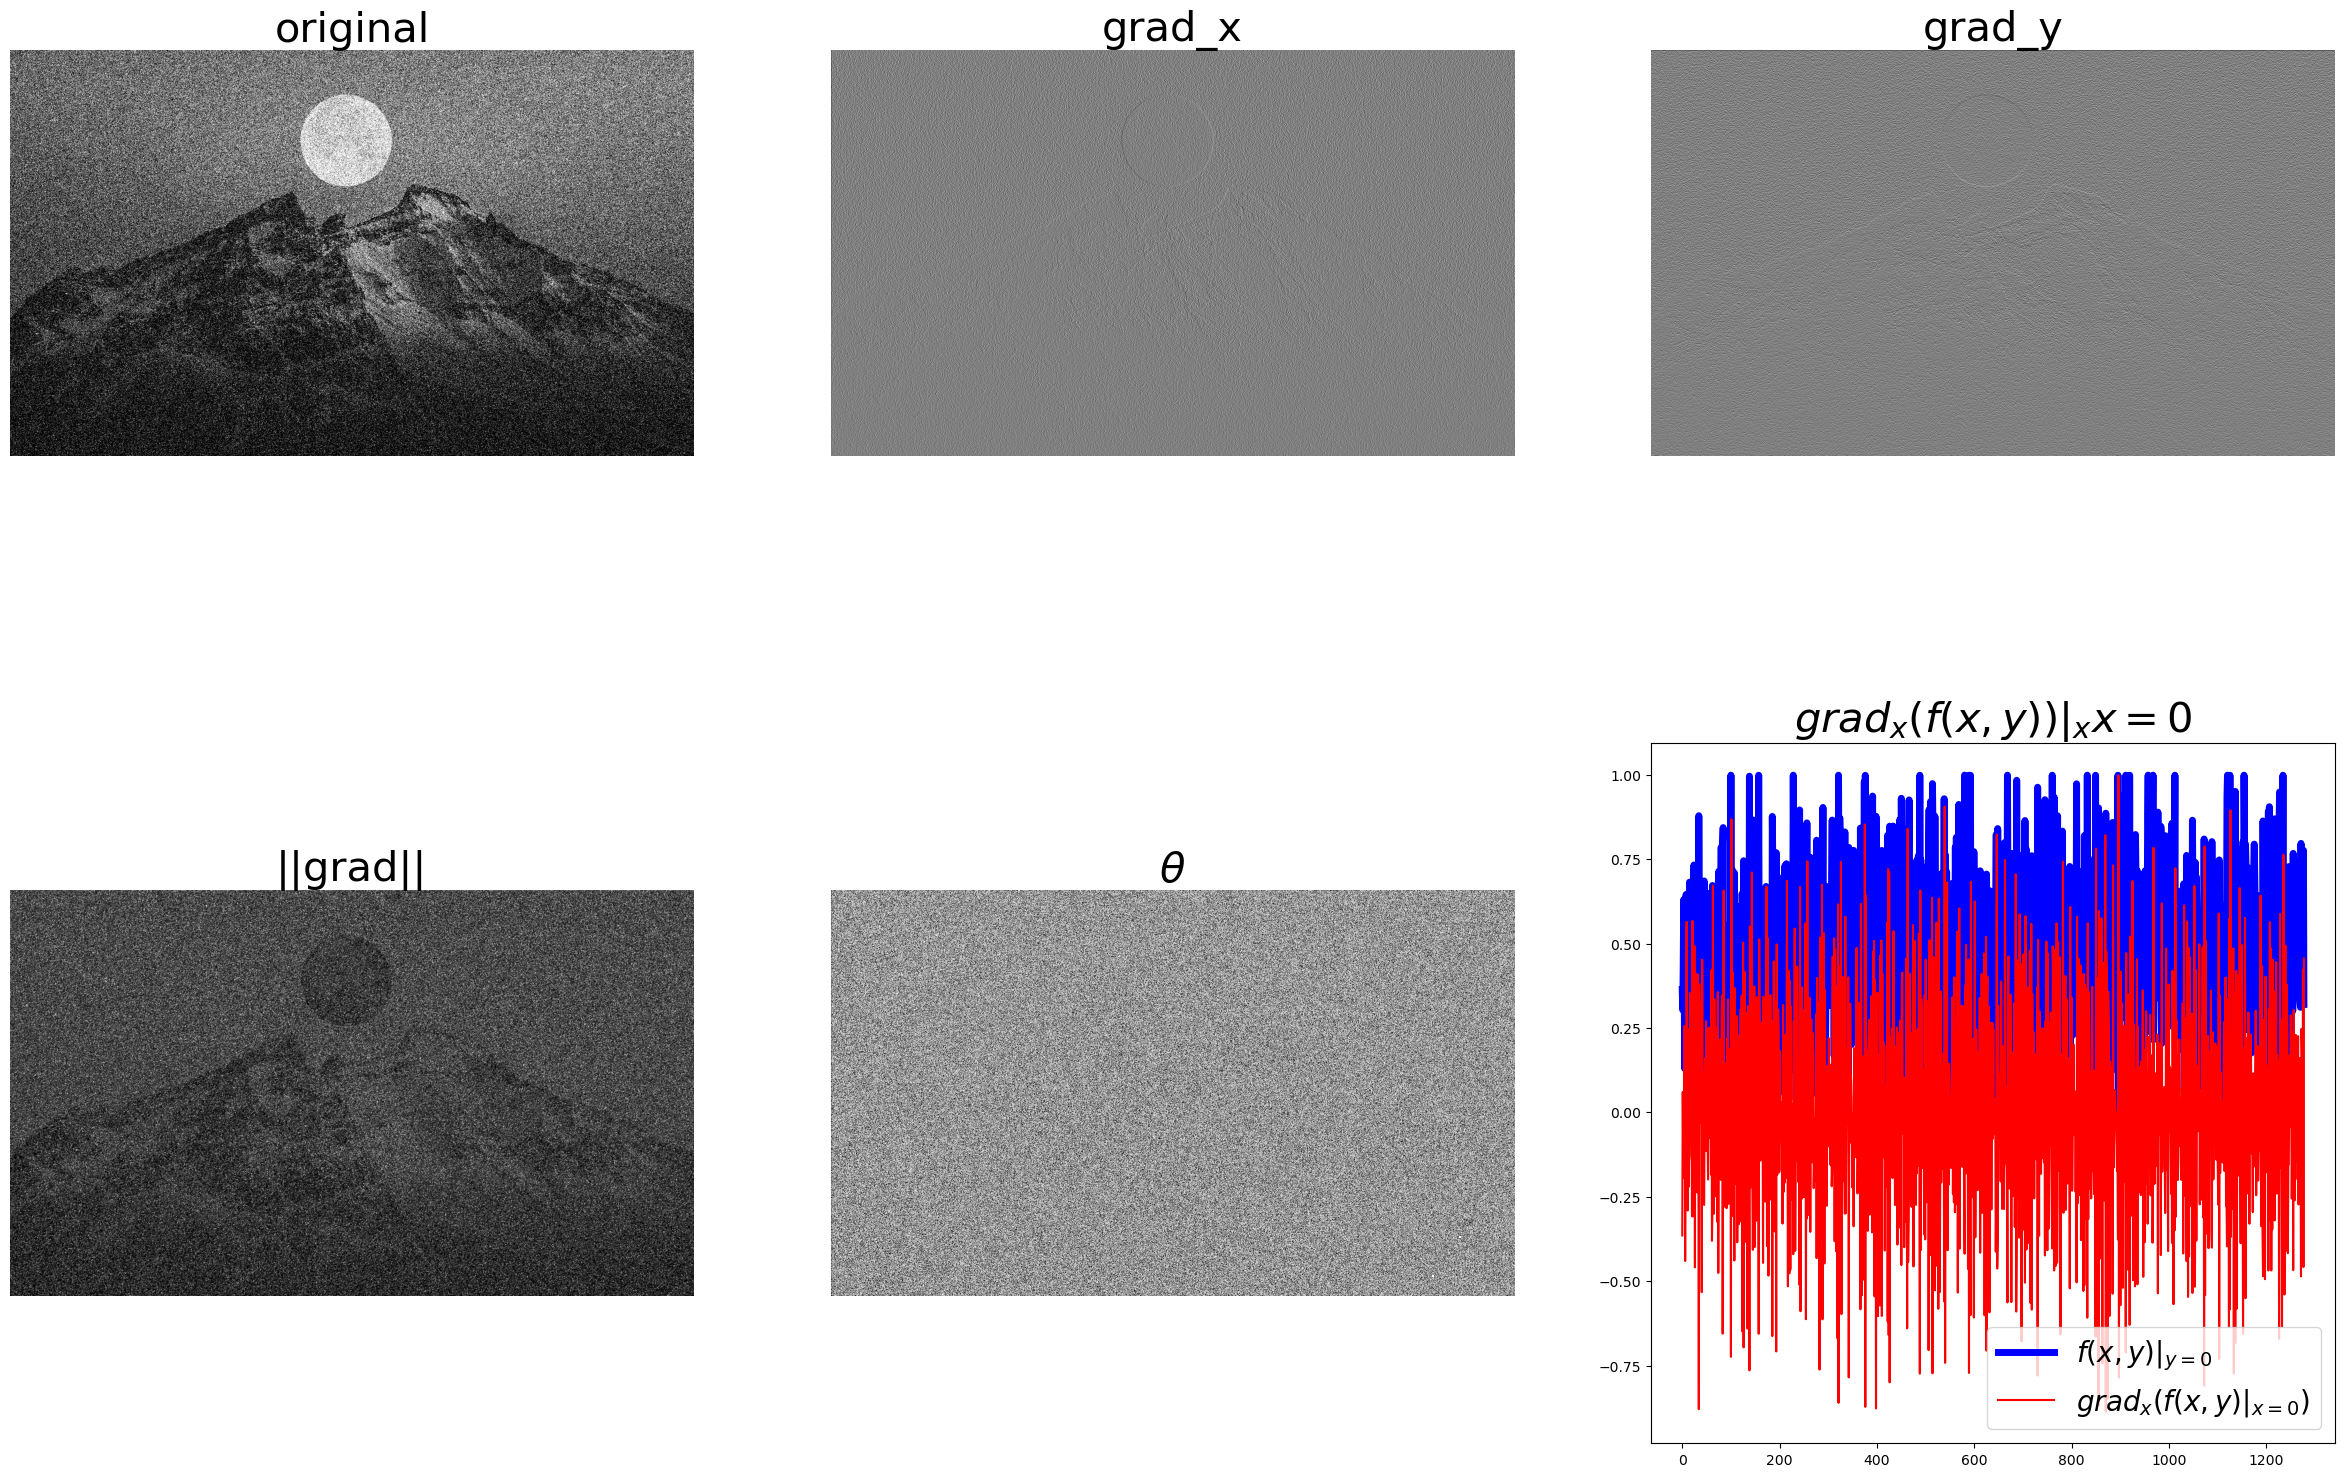

In [6]:
ker_x = [[-1,1]]
ker_y = [[-1],[1]]
im = rgb2gray(imread("image1.jpg"))
sigma = 0.25
sign = np.random.random(im.shape)
sign[sign <= 0.5] = -1
sign[sign > 0.5] = 1
im = random_noise(im,var=sigma**2)
im = gaussian(im,sigma=0.25)
print(np.max(im))
im_x = signal.convolve2d(im,ker_x,mode='same')
im_y = signal.convolve2d(im,ker_y,mode='same')
im_mag = np.sqrt(im_x**2 + im_y**2)
im_ang = np.arctan(im_y/im_x)
plt.gray()
plt.figure(figsize=(30,20))
plt.subplot(231)
plt.imshow(im)
plt.title("original",size=30)
plt.axis("off")
plt.subplot(232)
plt.imshow(im_x)
plt.title("grad_x",size=30)
plt.axis("off")
plt.subplot(233)
plt.imshow(im_y)
plt.title("grad_y",size=30)
plt.axis("off")
plt.subplot(234)
plt.imshow(im_mag)
plt.title("||grad||",size=30)
plt.axis("off")
plt.subplot(235)
plt.imshow(im_ang)
plt.title(r"$\theta$",size=30)
plt.axis("off")
plt.subplot(236)
plt.plot(range(im.shape[1]),im[0,:],'b-',label=r"$f(x,y)|_{y=0}$",linewidth=5)
plt.plot(range(im.shape[1]),im_x[0,:],'r-',label=r"$grad_x(f(x,y)|_{x=0}$)")
plt.title(r"$grad_x (f(x,y)) | _x{x=0}$",size=30)
plt.legend(prop={'size':20})
plt.show()

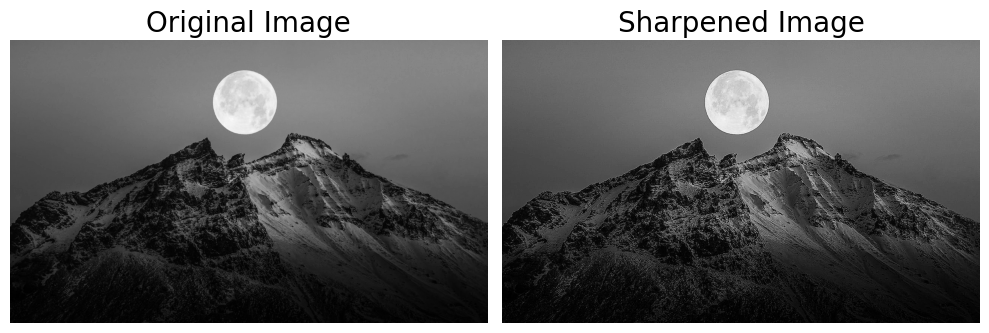

In [8]:
from skimage.filters import laplace
im = rgb2gray(imread("image1.jpg"))
im1 = np.clip(laplace(im)+im,0,1)
pylab.figure(figsize=(10,15))
pylab.subplot(121),plot_image(im,"Original Image")
pylab.subplot(122),plot_image(im1,"Sharpened Image")
pylab.tight_layout()
pylab.show()

<Figure size 640x480 with 0 Axes>

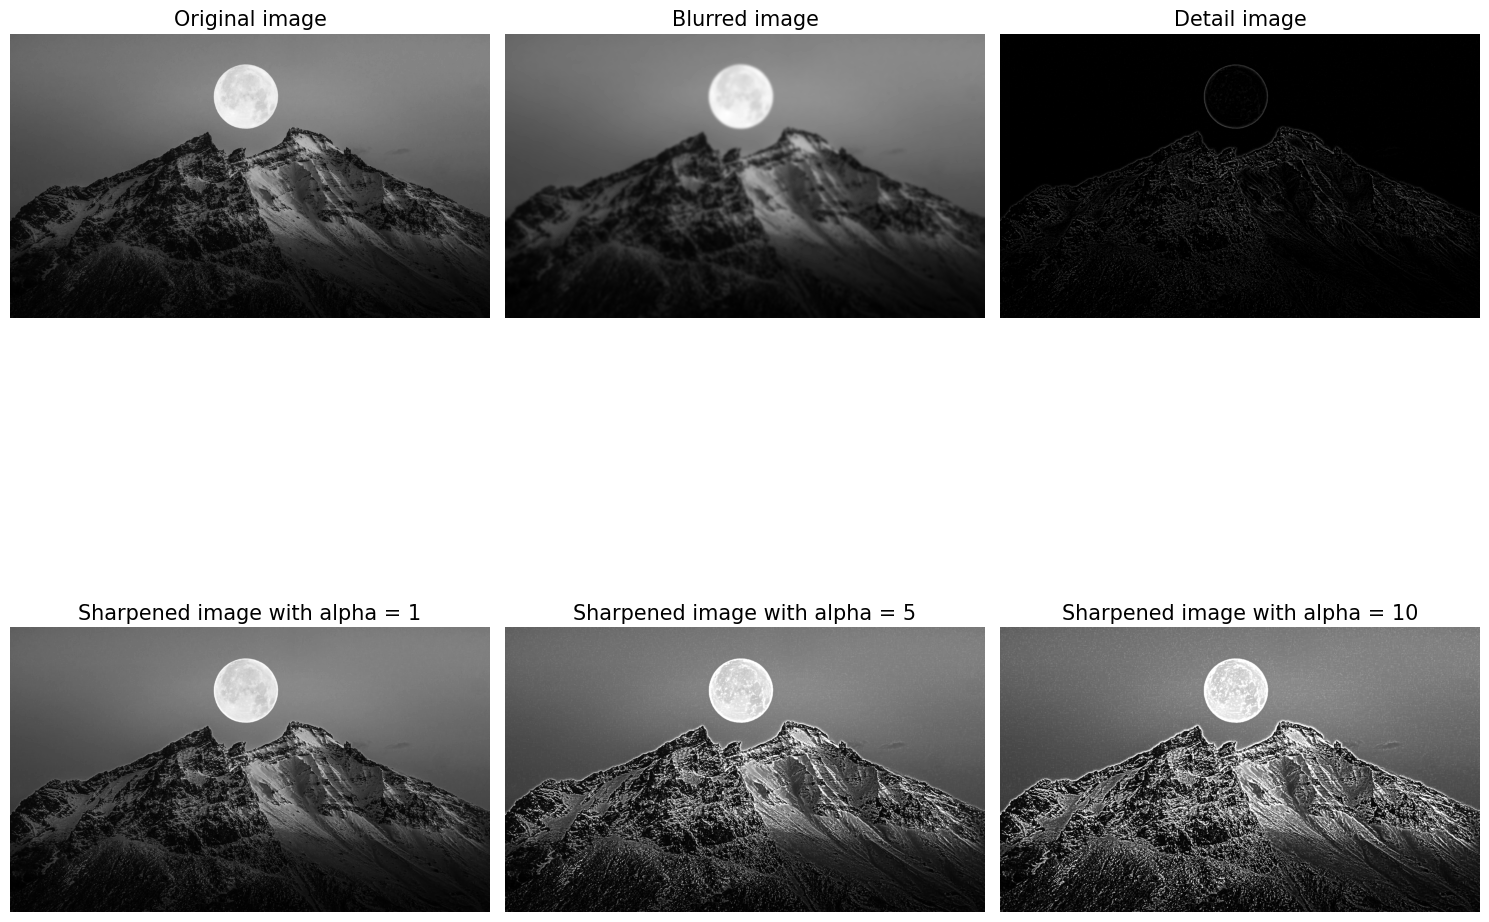

In [10]:
# Unsharp masking
def rgb2gray(im):
    '''
    the input image is an RGB image
    with pixel values for each channel in [0,1]
    '''
    return np.clip(0.2989*im[...,0]+0.5870*im[...,1]+0.1140*im[...,2],0,1)

im = rgb2gray(img_as_float(imread("image1.jpg")))
im_blurred = ndimage.gaussian_filter(im,3)
im_detail = np.clip(im - im_blurred,0,1)
pylab.gray()
fig,axes = pylab.subplots(nrows=2,ncols=3,sharex=True,sharey=True,figsize=(15,15))
axes = axes.ravel()
axes[0].set_title("Original image",size=15),axes[0].imshow(im)
axes[1].set_title("Blurred image",size=15),axes[1].imshow(im_blurred)
axes[2].set_title("Detail image",size=15),axes[2].imshow(im_detail)
alpha = [1,5,10]
for i in range(3):
    im_sharp = np.clip(im+alpha[i]*im_detail,0,1)
    axes[3+i].set_title("Sharpened image with alpha = %d"%alpha[i],size=15),axes[3+i].imshow(im_sharp)

for ax in axes:
    ax.axis("off")
fig.tight_layout()
pylab.show()